In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Hepatitis

In [2]:
hepatitis=pd.read_csv('hepatitis_csv.csv')
hepatitis

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


## hepatitis Preprocessing

In [3]:
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [4]:
hepatitis.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [5]:
hepatitis.drop(['protime','albumin','alk_phosphate','bilirubin','sgot'],axis=1,inplace=True)
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              155 non-null    int64 
 1   sex              155 non-null    object
 2   steroid          154 non-null    object
 3   antivirals       155 non-null    bool  
 4   fatigue          154 non-null    object
 5   malaise          154 non-null    object
 6   anorexia         154 non-null    object
 7   liver_big        145 non-null    object
 8   liver_firm       144 non-null    object
 9   spleen_palpable  150 non-null    object
 10  spiders          150 non-null    object
 11  ascites          150 non-null    object
 12  varices          150 non-null    object
 13  histology        155 non-null    bool  
 14  class            155 non-null    object
dtypes: bool(2), int64(1), object(12)
memory usage: 16.2+ KB


In [6]:
hepatitis.dropna()
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              155 non-null    int64 
 1   sex              155 non-null    object
 2   steroid          154 non-null    object
 3   antivirals       155 non-null    bool  
 4   fatigue          154 non-null    object
 5   malaise          154 non-null    object
 6   anorexia         154 non-null    object
 7   liver_big        145 non-null    object
 8   liver_firm       144 non-null    object
 9   spleen_palpable  150 non-null    object
 10  spiders          150 non-null    object
 11  ascites          150 non-null    object
 12  varices          150 non-null    object
 13  histology        155 non-null    bool  
 14  class            155 non-null    object
dtypes: bool(2), int64(1), object(12)
memory usage: 16.2+ KB


In [7]:
for column in hepatitis.columns:
    if hepatitis[column].isnull().sum()>0:
        original_dtype = hepatitis[column].dtype
        hepatitis[column]=hepatitis[column].fillna(hepatitis[column].mode()[0])
        hepatitis[column]=hepatitis[column].astype(original_dtype)

hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              155 non-null    int64 
 1   sex              155 non-null    object
 2   steroid          155 non-null    object
 3   antivirals       155 non-null    bool  
 4   fatigue          155 non-null    object
 5   malaise          155 non-null    object
 6   anorexia         155 non-null    object
 7   liver_big        155 non-null    object
 8   liver_firm       155 non-null    object
 9   spleen_palpable  155 non-null    object
 10  spiders          155 non-null    object
 11  ascites          155 non-null    object
 12  varices          155 non-null    object
 13  histology        155 non-null    bool  
 14  class            155 non-null    object
dtypes: bool(2), int64(1), object(12)
memory usage: 16.2+ KB


C:\Users\khush\AppData\Local\Temp\ipykernel_11192\2144586160.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hepatitis[column]=hepatitis[column].fillna(hepatitis[column].mode()[0])


In [8]:
""" hepatitis['liver_big'].fillna(hepatitis['liver_big'].mode(),inplace=True)
hepatitis['steroid']=hepatitis['steroid'].fillna(hepatitis['steroid'].mode())
hepatitis['fatigue']=hepatitis['fatigue'].fillna(hepatitis['fatigue'].mode())
hepatitis['liver_firm']=hepatitis['liver_firm'].fillna(hepatitis['liver_firm'].mode()) """

" hepatitis['liver_big'].fillna(hepatitis['liver_big'].mode(),inplace=True)\nhepatitis['steroid']=hepatitis['steroid'].fillna(hepatitis['steroid'].mode())\nhepatitis['fatigue']=hepatitis['fatigue'].fillna(hepatitis['fatigue'].mode())\nhepatitis['liver_firm']=hepatitis['liver_firm'].fillna(hepatitis['liver_firm'].mode()) "

In [9]:
hepatitis

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,False,live
3,31,female,True,True,False,False,False,True,False,False,False,False,False,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,True,live


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

for column in hepatitis.columns[1:]:
        
    hepatitis[column]=encoder.fit_transform(hepatitis[column])
hepatitis

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0,1
3,31,0,1,1,0,0,0,1,0,0,0,0,0,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,0,1,0,1,1,1,1,0,0,1,1,1,1,0
151,44,0,1,0,1,0,0,1,1,0,0,0,0,1,1
152,61,0,0,0,1,1,0,0,1,0,1,0,0,1,1
153,53,1,0,0,1,0,0,1,0,1,1,0,1,1,1


In [11]:
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              155 non-null    int64
 1   sex              155 non-null    int64
 2   steroid          155 non-null    int64
 3   antivirals       155 non-null    int64
 4   fatigue          155 non-null    int64
 5   malaise          155 non-null    int64
 6   anorexia         155 non-null    int64
 7   liver_big        155 non-null    int64
 8   liver_firm       155 non-null    int64
 9   spleen_palpable  155 non-null    int64
 10  spiders          155 non-null    int64
 11  ascites          155 non-null    int64
 12  varices          155 non-null    int64
 13  histology        155 non-null    int64
 14  class            155 non-null    int64
dtypes: int64(15)
memory usage: 18.3 KB


In [12]:
hepatitis=hepatitis.rename(columns={'class':'target'})
hepatitis

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,target
0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0,1
3,31,0,1,1,0,0,0,1,0,0,0,0,0,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,0,1,0,1,1,1,1,0,0,1,1,1,1,0
151,44,0,1,0,1,0,0,1,1,0,0,0,0,1,1
152,61,0,0,0,1,1,0,0,1,0,1,0,0,1,1
153,53,1,0,0,1,0,0,1,0,1,1,0,1,1,1


In [13]:
""" from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
hepatitis['age']=scaler.fit_transform(hepatitis[['age']])
hepatitis """

" from sklearn.preprocessing import StandardScaler\nscaler=StandardScaler()\nhepatitis['age']=scaler.fit_transform(hepatitis[['age']])\nhepatitis "

# HORSE DATASET

## Horse Dataset Preprocessing


In [14]:
horse=pd.read_csv('horse.csv')
horse

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


In [15]:
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [16]:
horse.drop(['hospital_number','peripheral_pulse','mucous_membrane','capillary_refill_time','pain','peristalsis',
            'abdominal_distention','nasogastric_tube','nasogastric_reflux','nasogastric_reflux_ph','rectal_exam_feces',
            'abdomen','packed_cell_volume','total_protein','abdomo_appearance','abdomo_protein','lesion_1','lesion_2','lesion_3'],axis=1,inplace=True)
horse

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,outcome,surgical_lesion,cp_data
0,no,adult,38.5,66.0,28.0,cool,died,no,no
1,yes,adult,39.2,88.0,20.0,NaN,euthanized,no,no
2,no,adult,38.3,40.0,24.0,normal,lived,no,yes
3,yes,young,39.1,164.0,84.0,cold,died,yes,yes
4,no,adult,37.3,104.0,35.0,NaN,died,no,no
...,...,...,...,...,...,...,...,...,...
294,yes,adult,NaN,120.0,70.0,cold,euthanized,no,no
295,no,adult,37.2,72.0,24.0,cool,euthanized,yes,yes
296,yes,adult,37.5,72.0,30.0,cold,died,yes,no
297,yes,adult,36.5,100.0,24.0,cool,lived,yes,yes


In [17]:
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   surgery              299 non-null    object 
 1   age                  299 non-null    object 
 2   rectal_temp          239 non-null    float64
 3   pulse                275 non-null    float64
 4   respiratory_rate     241 non-null    float64
 5   temp_of_extremities  243 non-null    object 
 6   outcome              299 non-null    object 
 7   surgical_lesion      299 non-null    object 
 8   cp_data              299 non-null    object 
dtypes: float64(3), object(6)
memory usage: 21.2+ KB


### horse['rectal_temp']

In [18]:
horse.rectal_temp.unique()

array([38.5, 39.2, 38.3, 39.1, 37.3,  nan, 37.9, 38.1, 37.2, 38. , 38.2,
       37.6, 37.5, 39.4, 39.9, 38.4, 38.6, 37.8, 37.7, 39. , 35.4, 38.9,
       37.4, 40.3, 37. , 39.7, 38.7, 36.4, 38.8, 39.6, 36.8, 39.5, 36.5,
       36. , 37.1, 39.3, 36.1, 36.6, 40.8, 36.9, 40. ])

In [19]:
horse['rectal_temp'].value_counts()

rectal_temp
38.0    25
38.5    19
38.3    18
37.8    17
38.2    16
37.5    12
38.1    12
38.6    12
38.4    11
38.7     7
37.7     7
37.2     7
37.9     7
37.6     7
37.3     6
38.8     6
39.2     5
39.3     4
39.0     4
38.9     4
39.5     4
37.1     3
37.4     3
39.4     3
39.1     2
36.5     2
40.3     2
37.0     2
35.4     1
39.9     1
36.4     1
39.7     1
39.6     1
36.8     1
36.0     1
36.1     1
36.6     1
40.8     1
36.9     1
40.0     1
Name: count, dtype: int64

In [20]:
horse['rectal_temp'].mean()

np.float64(38.16861924686192)

In [21]:
horse['rectal_temp'].median()

np.float64(38.2)

In [22]:
horse['rectal_temp']=horse['rectal_temp'].fillna(horse['rectal_temp'].median())
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   surgery              299 non-null    object 
 1   age                  299 non-null    object 
 2   rectal_temp          299 non-null    float64
 3   pulse                275 non-null    float64
 4   respiratory_rate     241 non-null    float64
 5   temp_of_extremities  243 non-null    object 
 6   outcome              299 non-null    object 
 7   surgical_lesion      299 non-null    object 
 8   cp_data              299 non-null    object 
dtypes: float64(3), object(6)
memory usage: 21.2+ KB


### horse['respiratory_rate']

In [23]:
horse.respiratory_rate.describe()

count    241.000000
mean      30.460581
std       17.666102
min        8.000000
25%       18.000000
50%       25.000000
75%       36.000000
max       96.000000
Name: respiratory_rate, dtype: float64

In [24]:
horse.respiratory_rate.mode()

0    20.0
1    24.0
Name: respiratory_rate, dtype: float64

In [25]:
horse['respiratory_rate']=horse['respiratory_rate'].fillna(horse['respiratory_rate'].mode().mean())
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   surgery              299 non-null    object 
 1   age                  299 non-null    object 
 2   rectal_temp          299 non-null    float64
 3   pulse                275 non-null    float64
 4   respiratory_rate     299 non-null    float64
 5   temp_of_extremities  243 non-null    object 
 6   outcome              299 non-null    object 
 7   surgical_lesion      299 non-null    object 
 8   cp_data              299 non-null    object 
dtypes: float64(3), object(6)
memory usage: 21.2+ KB


### horse['temp_of_extremities']

In [26]:
horse.temp_of_extremities.value_counts()

temp_of_extremities
cool      108
normal     78
warm       30
cold       27
Name: count, dtype: int64

In [27]:
horseValcount=horse.temp_of_extremities.value_counts(normalize=True)
horseValcount

temp_of_extremities
cool      0.444444
normal    0.320988
warm      0.123457
cold      0.111111
Name: proportion, dtype: float64

In [28]:
horseValcount.index

Index(['cool', 'normal', 'warm', 'cold'], dtype='object', name='temp_of_extremities')

In [29]:
def fill_missing_with_weightage(column, value_counts):
    missing_indices = column[column.isnull()].index
    fill_values = np.random.choice(value_counts.index, size=len(missing_indices), p=value_counts.values)
    column.loc[missing_indices] = fill_values
    return column

horse['temp_of_extremities']=fill_missing_with_weightage(horse['temp_of_extremities'],horseValcount)
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   surgery              299 non-null    object 
 1   age                  299 non-null    object 
 2   rectal_temp          299 non-null    float64
 3   pulse                275 non-null    float64
 4   respiratory_rate     299 non-null    float64
 5   temp_of_extremities  299 non-null    object 
 6   outcome              299 non-null    object 
 7   surgical_lesion      299 non-null    object 
 8   cp_data              299 non-null    object 
dtypes: float64(3), object(6)
memory usage: 21.2+ KB


C:\Users\khush\AppData\Local\Temp\ipykernel_11192\434476184.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[missing_indices] = fill_values


In [30]:
horse.temp_of_extremities.value_counts()

temp_of_extremities
cool      133
normal     98
cold       36
warm       32
Name: count, dtype: int64

In [31]:
horse.temp_of_extremities.mode()

0    cool
Name: temp_of_extremities, dtype: object

### horse['pulse']

In [32]:
horse.pulse.unique()

array([ 66.,  88.,  40., 164., 104.,  nan,  48.,  60.,  80.,  90.,  72.,
        42.,  92.,  76.,  96., 128.,  64., 110., 130., 108., 100., 112.,
        52., 146., 150., 120., 140.,  84.,  46., 114., 160.,  54.,  56.,
        38.,  98.,  50.,  44.,  70.,  78.,  49.,  30., 136., 132.,  65.,
        86., 129.,  68.,  36.,  45., 124., 184.,  75.,  82.])

In [33]:
horse.pulse.value_counts()

pulse
48.0     27
60.0     25
40.0     18
88.0     12
52.0     12
72.0     11
44.0     11
100.0    11
42.0     10
120.0    10
96.0      8
80.0      8
84.0      8
64.0      8
54.0      7
56.0      7
66.0      6
50.0      6
68.0      5
104.0     5
70.0      4
76.0      4
92.0      4
86.0      3
90.0      3
108.0     3
78.0      3
36.0      3
112.0     3
45.0      2
30.0      2
130.0     2
124.0     2
114.0     2
150.0     2
140.0     2
110.0     1
128.0     1
164.0     1
38.0      1
146.0     1
98.0      1
160.0     1
46.0      1
65.0      1
132.0     1
136.0     1
49.0      1
129.0     1
184.0     1
75.0      1
82.0      1
Name: count, dtype: int64

In [34]:
horse.pulse.mean()

np.float64(72.0)

In [35]:
horse.pulse.median()

np.float64(64.0)

In [36]:
horse['pulse'].fillna(horse['pulse'].mean(),inplace=True)
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   surgery              299 non-null    object 
 1   age                  299 non-null    object 
 2   rectal_temp          299 non-null    float64
 3   pulse                299 non-null    float64
 4   respiratory_rate     299 non-null    float64
 5   temp_of_extremities  299 non-null    object 
 6   outcome              299 non-null    object 
 7   surgical_lesion      299 non-null    object 
 8   cp_data              299 non-null    object 
dtypes: float64(3), object(6)
memory usage: 21.2+ KB


C:\Users\khush\AppData\Local\Temp\ipykernel_11192\3979595902.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  horse['pulse'].fillna(horse['pulse'].mean(),inplace=True)


In [37]:
horse

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,outcome,surgical_lesion,cp_data
0,no,adult,38.5,66.0,28.0,cool,died,no,no
1,yes,adult,39.2,88.0,20.0,cold,euthanized,no,no
2,no,adult,38.3,40.0,24.0,normal,lived,no,yes
3,yes,young,39.1,164.0,84.0,cold,died,yes,yes
4,no,adult,37.3,104.0,35.0,normal,died,no,no
...,...,...,...,...,...,...,...,...,...
294,yes,adult,38.2,120.0,70.0,cold,euthanized,no,no
295,no,adult,37.2,72.0,24.0,cool,euthanized,yes,yes
296,yes,adult,37.5,72.0,30.0,cold,died,yes,no
297,yes,adult,36.5,100.0,24.0,cool,lived,yes,yes


In [38]:
horse=horse.rename(columns={'outcome':'target'})
horse

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,target,surgical_lesion,cp_data
0,no,adult,38.5,66.0,28.0,cool,died,no,no
1,yes,adult,39.2,88.0,20.0,cold,euthanized,no,no
2,no,adult,38.3,40.0,24.0,normal,lived,no,yes
3,yes,young,39.1,164.0,84.0,cold,died,yes,yes
4,no,adult,37.3,104.0,35.0,normal,died,no,no
...,...,...,...,...,...,...,...,...,...
294,yes,adult,38.2,120.0,70.0,cold,euthanized,no,no
295,no,adult,37.2,72.0,24.0,cool,euthanized,yes,yes
296,yes,adult,37.5,72.0,30.0,cold,died,yes,no
297,yes,adult,36.5,100.0,24.0,cool,lived,yes,yes


In [39]:
horse['surgery']=encoder.fit_transform(horse['surgery'])
horse['age']=encoder.fit_transform(horse['age'])
horse['temp_of_extremities']=encoder.fit_transform(horse['temp_of_extremities'])
horse['surgical_lesion']=encoder.fit_transform(horse['surgical_lesion'])
horse['cp_data']=encoder.fit_transform(horse['cp_data'])
horse['target']=encoder.fit_transform(horse['target'])
horse

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,target,surgical_lesion,cp_data
0,0,0,38.5,66.0,28.0,1,0,0,0
1,1,0,39.2,88.0,20.0,0,1,0,0
2,0,0,38.3,40.0,24.0,2,2,0,1
3,1,1,39.1,164.0,84.0,0,0,1,1
4,0,0,37.3,104.0,35.0,2,0,0,0
...,...,...,...,...,...,...,...,...,...
294,1,0,38.2,120.0,70.0,0,1,0,0
295,0,0,37.2,72.0,24.0,1,1,1,1
296,1,0,37.5,72.0,30.0,0,0,1,0
297,1,0,36.5,100.0,24.0,1,2,1,1


In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
horse['rectal_temp']=scaler.fit_transform(horse[['rectal_temp']])
horse['pulse']=scaler.fit_transform(horse[['pulse']])
horse['respiratory_rate']=scaler.fit_transform(horse[['respiratory_rate']])
horse

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,target,surgical_lesion,cp_data
0,0,0,0.496498,-0.218798,-0.050652,1,0,0,0
1,1,0,1.565603,0.583463,-0.545177,0,1,0,0
2,0,0,0.191039,-1.166925,-0.297914,2,2,0,1
3,1,1,1.412873,3.354910,3.411024,0,0,1,1
4,0,0,-1.336253,1.166925,0.382058,2,0,0,0
...,...,...,...,...,...,...,...,...,...
294,1,0,0.038310,1.750388,2.545605,0,1,0,0
295,0,0,-1.488983,0.000000,-0.297914,1,1,1,1
296,1,0,-1.030795,0.000000,0.072980,0,0,1,0
297,1,0,-2.558088,1.021059,-0.297914,1,2,1,1


# Ques1

Q1. Use the Decision Tree classification algorithm to construct a classifier on two datasets. Evaluate the classifier's performance by dividing the dataset into a training set (75%) and a test set (25%). Compare the performance with that of:


 Bagging ensemble consisting of 3,5,7,9 Decision tree classifiers

 Adaboost ensemble consisting of 3,5,7,9 Decision tree classifiers

## Synthetic Dataset

In [41]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

X,y=make_classification(n_samples=1000, n_features=5, n_classes=2)
X,y

(array([[ 0.24457185, -0.36376872, -0.28463288,  0.20945353,  0.68144431],
        [-1.74208534, -1.23130532,  0.0884466 ,  0.92045509, -1.17982646],
        [ 2.1202694 ,  1.79026276,  0.88760403, -1.30434305,  1.15561204],
        ...,
        [ 0.41058044,  1.98081685, -0.14416049, -1.28391061, -1.34694927],
        [ 0.23555062, -0.76527803, -0.37638288,  0.46359441,  1.05513475],
        [ 2.04989066,  2.05724487,  1.14853041, -1.46704782,  0.80351278]]),
 array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 0, 

In [42]:
train_test_split(X,y,test_size=0.25,random_state=42)

[array([[-1.58890674, -1.8969759 , -0.93572293,  1.32796433, -0.33218161],
        [ 0.18569769,  1.51789432, -0.1786411 , -0.97324721, -1.20707122],
        [ 0.04490252, -1.36557948, -0.81947612,  0.85814246,  1.37350424],
        ...,
        [ 0.13823272, -0.69854393,  0.98079256,  0.42948603,  0.85896666],
        [ 1.86613213,  1.31074375,  1.47988929, -0.98079795,  1.27175522],
        [ 0.89032399,  0.25496584, -0.86393402, -0.23417941,  0.96276115]]),
 array([[-0.50005998, -0.26217794,  0.71557667,  0.20661542, -0.42638817],
        [ 1.04341624,  0.49362902, -0.24400121, -0.3974016 ,  0.94104755],
        [ 1.38878847,  1.74865634, -0.6756341 , -1.21788948,  0.20326082],
        ...,
        [-2.82314656, -2.07744611,  0.64533049,  1.54343001, -1.83311139],
        [-1.36346717, -0.94040701,  1.36287161,  0.70570753, -0.9457948 ],
        [-0.10342672,  0.04887164, -0.80074549, -0.02233241, -0.18728615]]),
 array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,

In [43]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [44]:
Dclf=DecisionTreeClassifier(random_state=42)
Dclf.fit(X_train,y_train)
Dclf_y_pred=Dclf.predict(X_test)
Dclf_y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0])

In [45]:
from sklearn.metrics import accuracy_score
DClf_accuracy=accuracy_score(y_test,Dclf_y_pred)*100
DClf_accuracy

97.0

In [46]:
from sklearn.metrics import precision_score
precision_score(y_test,Dclf_y_pred)*100

np.float64(96.80851063829788)

In [47]:
from sklearn.metrics import recall_score
recall_score(y_test,Dclf_y_pred)*100

np.float64(96.80851063829788)

In [48]:
from sklearn.metrics import f1_score
f1_score(y_test,Dclf_y_pred)*100

np.float64(96.80851063829788)

In [49]:
BaggingDF=pd.DataFrame(None, columns=['estimators','precision_score','recall_score','f1_score'])
BaggingDF
convert_dict={'estimators':int,'precision_score':float,'recall_score':float,'f1_score':float}

In [50]:
AdaBoostDF=pd.DataFrame(None,columns=['estimators','precision_score','recall_score','f1_score'])
convert_dict={'estimators':int,'precision_score':float,'recall_score':float,'f1_score':float}
AdaBoostDF

,estimators,precision_score,recall_score,f1_score


In [51]:
for i in range(3,10,2):       # here i = n_estimators or number of decisionTree models in a bag
    clf2=BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=i,random_state=42)
    clf3=AdaBoostClassifier(estimator=DecisionTreeClassifier(),n_estimators=i,random_state=42)
    
    clf2.fit(X_train,y_train)
    clf3.fit(X_train,y_train)

    clf2_predict=clf2.predict(X_test)
    clf3_predict=clf3.predict(X_test)

    clf2_precision=precision_score(y_test,clf2_predict)
    clf3_precision=precision_score(y_test,clf3_predict)

    clf2_recall=recall_score(y_test,clf2_predict)
    clf3_recall=recall_score(y_test,clf3_predict)

    clf2_f1score=f1_score(y_test,clf2_predict)
    clf3_f1score=f1_score(y_test,clf3_predict)

    BaggingDF.loc[len(BaggingDF.index)]=[i,clf2_precision,clf2_recall,clf2_f1score]
    AdaBoostDF.loc[len(AdaBoostDF.index)]=[i,clf2_precision,clf2_recall,clf2_f1score]


BaggingDF=BaggingDF.astype(convert_dict)
print(BaggingDF.dtypes,"\n")
print("Bagging Result")
BaggingDF.drop_duplicates(subset=['estimators'], inplace=True)
print(BaggingDF)


AdaBoostDF=AdaBoostDF.astype(convert_dict)

print(AdaBoostDF.dtypes,"\n")
AdaBoostDF.drop_duplicates(subset=['estimators'], inplace=True)
print(AdaBoostDF)



c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


estimators           int64
precision_score    float64
recall_score       float64
f1_score           float64
dtype: object 

   estimators  precision_score  recall_score  f1_score
0           3         0.989474           1.0  0.994709
1           5         0.979167           1.0  0.989474
2           7         0.979167           1.0  0.989474
3           9         0.979167           1.0  0.989474
estimators           int64
precision_score    float64
recall_score       float64
f1_score           float64
dtype: object 

   estimators  precision_score  recall_score  f1_score
0           3         0.989474           1.0  0.994709
1           5         0.979167           1.0  0.989474
2           7         0.979167           1.0  0.989474
3           9         0.979167           1.0  0.989474


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [52]:
# Combine DataFrames with an additional column to distinguish classifiers
BaggingDF['Classifier'] = 'Bagging'
AdaBoostDF['Classifier'] = 'AdaBoost'

# Merge the two DataFrames 
comparison_df = pd.concat([BaggingDF, AdaBoostDF],ignore_index=True)

comparison_df

,estimators,precision_score,recall_score,f1_score,Classifier
0,3,0.989474,1.0,0.994709,Bagging
1,5,0.979167,1.0,0.989474,Bagging
2,7,0.979167,1.0,0.989474,Bagging
3,9,0.979167,1.0,0.989474,Bagging
4,3,0.989474,1.0,0.994709,AdaBoost
5,5,0.979167,1.0,0.989474,AdaBoost
6,7,0.979167,1.0,0.989474,AdaBoost
7,9,0.979167,1.0,0.989474,AdaBoost


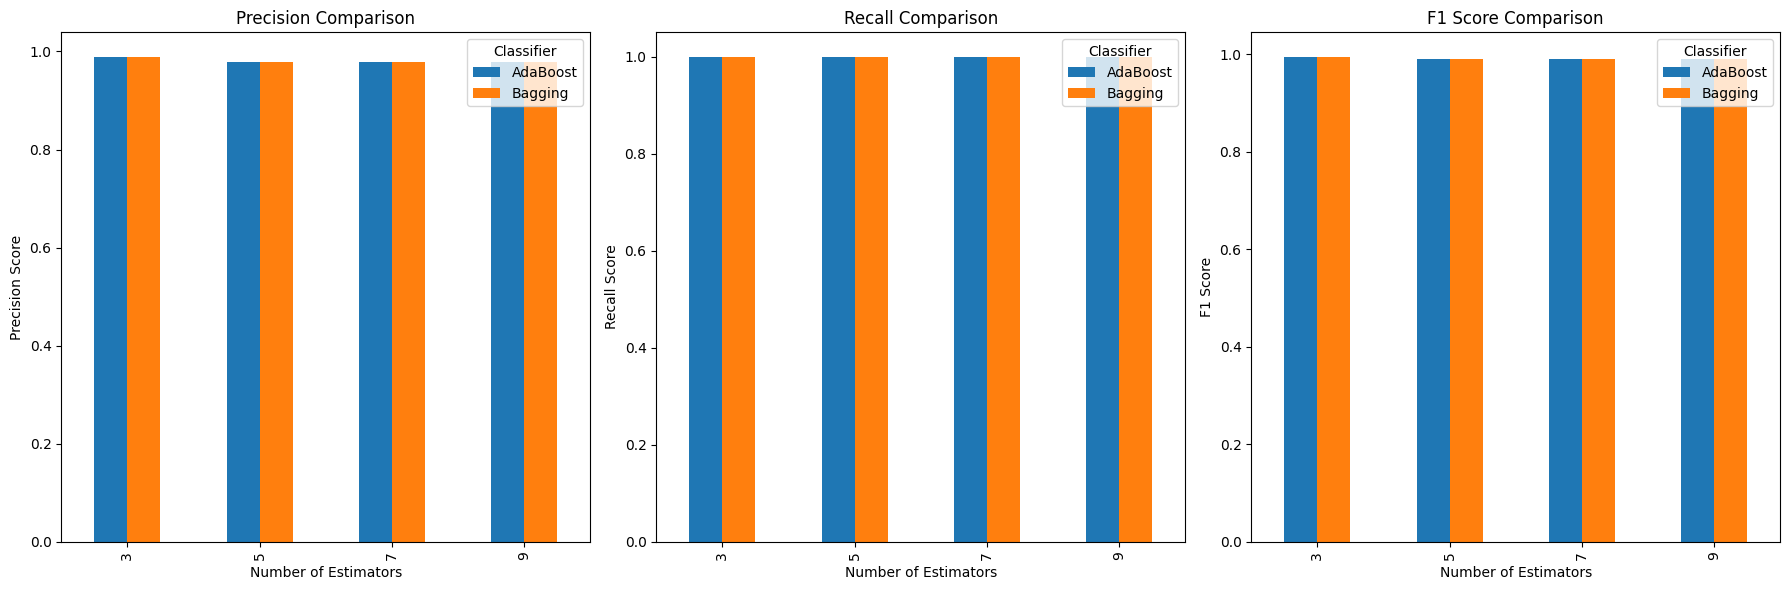

In [53]:
# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Precision
comparison_df.pivot(index='estimators', columns='Classifier', values='precision_score').plot(kind='bar', ax=axes[0])
axes[0].set_title('Precision Comparison')
axes[0].set_ylabel('Precision Score')
axes[0].set_xlabel('Number of Estimators')


# Plot Recall
comparison_df.pivot(index='estimators', columns='Classifier', values='recall_score').plot(kind='bar', ax=axes[1])
axes[1].set_title('Recall Comparison')
axes[1].set_ylabel('Recall Score')
axes[1].set_xlabel('Number of Estimators')

# Plot F1 Score
comparison_df.pivot(index='estimators', columns='Classifier', values='f1_score').plot(kind='bar', ax=axes[2])
axes[2].set_title('F1 Score Comparison')
axes[2].set_ylabel('F1 Score')
axes[2].set_xlabel('Number of Estimators')

# Adjust layout
plt.tight_layout()
plt.show()

## Iris Dataset

In [54]:
from sklearn.datasets import load_iris
iris=load_iris()

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [55]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [56]:
iris.data[:,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [57]:
from sklearn.datasets import load_iris
iris=load_iris()

X_train,X_test,y_train,y_test=train_test_split(iris.data, iris.target,test_size=0.25,random_state=42)



train_dict={'sepal length (cm)':X_train[:,0],
 'sepal width (cm)':X_train[:,1],
 'petal length (cm)':X_train[:,2],
 'petal width (cm)':X_train[:,3],
 'target':y_train}

trainDF=pd.DataFrame(train_dict)
trainDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.0,3.6,1.4,0.2,0
1,5.2,4.1,1.5,0.1,0
2,5.8,2.7,5.1,1.9,2
3,6.0,3.4,4.5,1.6,1
4,6.7,3.1,4.7,1.5,1
...,...,...,...,...,...
107,6.1,2.8,4.0,1.3,1
108,4.9,2.5,4.5,1.7,2
109,5.8,4.0,1.2,0.2,0
110,5.8,2.6,4.0,1.2,1


In [58]:
test_dict={'sepal length (cm)':X_test[:,0],
 'sepal width (cm)':X_test[:,1],
 'petal length (cm)':X_test[:,2],
 'petal width (cm)':X_test[:,3],
 'target':y_test}

testDF=pd.DataFrame(test_dict)
testDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,6.1,2.8,4.7,1.2,1
1,5.7,3.8,1.7,0.3,0
2,7.7,2.6,6.9,2.3,2
3,6.0,2.9,4.5,1.5,1
4,6.8,2.8,4.8,1.4,1
5,5.4,3.4,1.5,0.4,0
6,5.6,2.9,3.6,1.3,1
7,6.9,3.1,5.1,2.3,2
8,6.2,2.2,4.5,1.5,1
9,5.8,2.7,3.9,1.2,1


In [59]:
clf1=DecisionTreeClassifier(random_state=42)
clf1.fit(X_train,y_train)
clf1_predict=clf1.predict(X_test)

clf1_precision=precision_score(y_test,clf1_predict,average='macro')
clf1_recall=recall_score(y_test,clf1_predict,average='macro')
clf1_f1score=f1_score(y_test,clf1_predict,average='macro')

data_dict={'precision_score':[clf1_precision],'recall_score':[clf1_recall],'f1_score':[clf1_f1score]}
DecisionDF=pd.DataFrame(data_dict)
DecisionDF

,precision_score,recall_score,f1_score
0,1.0,1.0,1.0


In [60]:
for i in range(3,10,2):       # here i = n_estimators or number of decisionTree models in a bag
    clf2=BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=i,random_state=42)
    clf3=AdaBoostClassifier(estimator=DecisionTreeClassifier(),n_estimators=i,random_state=42)
    
    clf2.fit(X_train,y_train)
    clf3.fit(X_train,y_train)

    clf2_predict=clf2.predict(X_test)
    clf3_predict=clf3.predict(X_test)

    clf2_precision=precision_score(y_test,clf2_predict,average='macro')
    clf3_precision=precision_score(y_test,clf3_predict,average='macro')

    clf2_recall=recall_score(y_test,clf2_predict,average='macro')
    clf3_recall=recall_score(y_test,clf3_predict,average='macro')

    clf2_f1score=f1_score(y_test,clf2_predict,average='macro')
    clf3_f1score=f1_score(y_test,clf3_predict,average='macro')

    BaggingDF.loc[len(BaggingDF.index)]=[i,clf2_precision,clf2_recall,clf2_f1score,'Bagging']
    
    AdaBoostDF.loc[len(AdaBoostDF.index)]=[i,clf2_precision,clf2_recall,clf2_f1score,'AdaBoost']
    


BaggingDF=BaggingDF.astype(convert_dict)
print(BaggingDF.dtypes)
BaggingDF.drop_duplicates(subset=['estimators'], inplace=True)
print(BaggingDF)


AdaBoostDF=AdaBoostDF.astype(convert_dict)

print(AdaBoostDF.dtypes)
AdaBoostDF.drop_duplicates(subset=['estimators'], inplace=True)
print(AdaBoostDF)

    



estimators           int64
precision_score    float64
recall_score       float64
f1_score           float64
Classifier          object
dtype: object
   estimators  precision_score  recall_score  f1_score Classifier
0           3         0.989474           1.0  0.994709    Bagging
1           5         0.979167           1.0  0.989474    Bagging
2           7         0.979167           1.0  0.989474    Bagging
3           9         0.979167           1.0  0.989474    Bagging
estimators           int64
precision_score    float64
recall_score       float64
f1_score           float64
Classifier          object
dtype: object
   estimators  precision_score  recall_score  f1_score Classifier
0           3         0.989474           1.0  0.994709   AdaBoost
1           5         0.979167           1.0  0.989474   AdaBoost
2           7         0.979167           1.0  0.989474   AdaBoost
3           9         0.979167           1.0  0.989474   AdaBoost


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [61]:
comparison_df = pd.concat([BaggingDF, AdaBoostDF],ignore_index=True)

comparison_df

,estimators,precision_score,recall_score,f1_score,Classifier
0,3,0.989474,1.0,0.994709,Bagging
1,5,0.979167,1.0,0.989474,Bagging
2,7,0.979167,1.0,0.989474,Bagging
3,9,0.979167,1.0,0.989474,Bagging
4,3,0.989474,1.0,0.994709,AdaBoost
5,5,0.979167,1.0,0.989474,AdaBoost
6,7,0.979167,1.0,0.989474,AdaBoost
7,9,0.979167,1.0,0.989474,AdaBoost


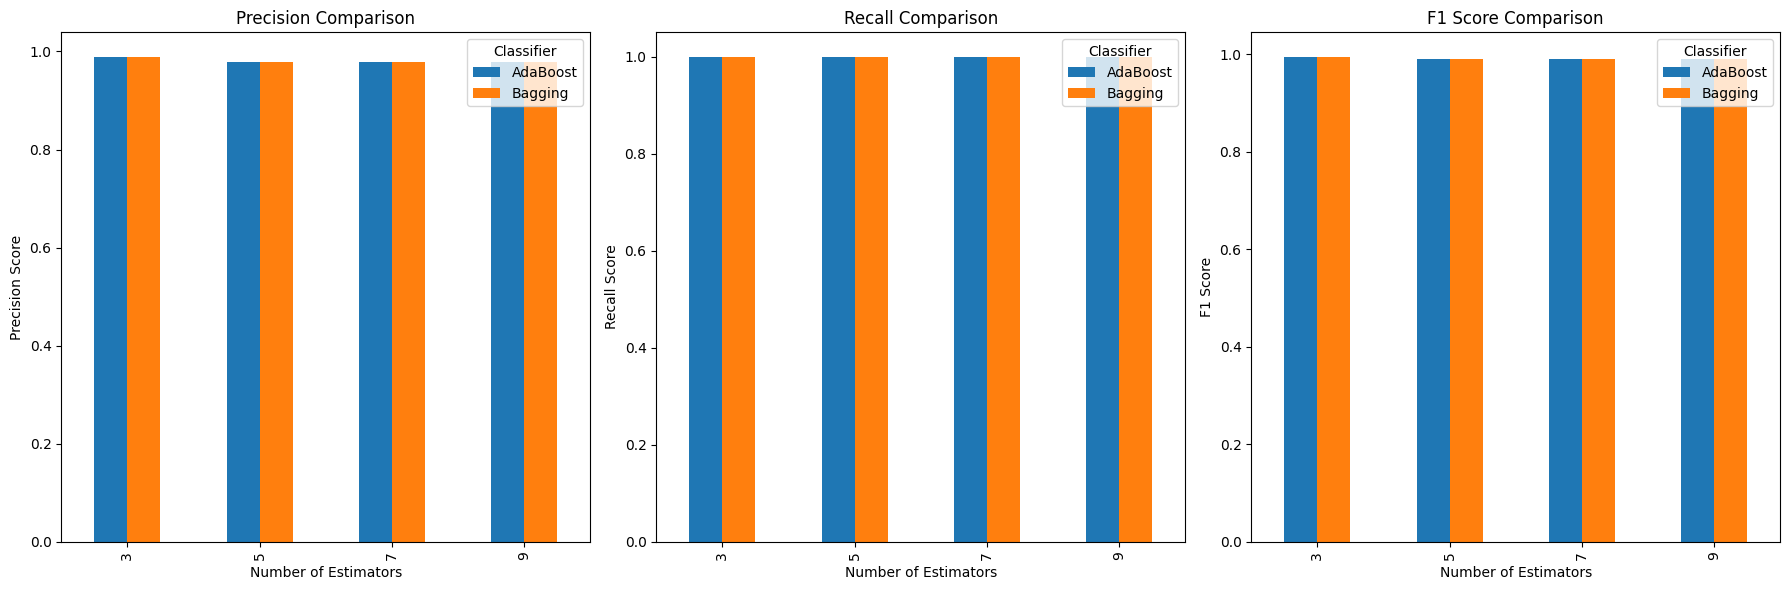

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Precision
comparison_df.pivot(index='estimators', columns='Classifier', values='precision_score').plot(kind='bar', ax=axes[0])
axes[0].set_title('Precision Comparison')
axes[0].set_ylabel('Precision Score')
axes[0].set_xlabel('Number of Estimators')


# Plot Recall
comparison_df.pivot(index='estimators', columns='Classifier', values='recall_score').plot(kind='bar', ax=axes[1])
axes[1].set_title('Recall Comparison')
axes[1].set_ylabel('Recall Score')
axes[1].set_xlabel('Number of Estimators')

# Plot F1 Score
comparison_df.pivot(index='estimators', columns='Classifier', values='f1_score').plot(kind='bar', ax=axes[2])
axes[2].set_title('F1 Score Comparison')
axes[2].set_ylabel('F1 Score')
axes[2].set_xlabel('Number of Estimators')

# Adjust layout
plt.tight_layout()
plt.show()

# Ques2

For any 10 datasets (from table 6.5) compare accuracy, precision, Recall and  Fmeasure of Decision tree, Bagging and Boosting, Random Forest. Clearly mention the parameters values used for each case and show results in a tabular form

## Diabetes Dataset

In [63]:
from sklearn.datasets import load_diabetes
dib=load_diabetes()
dib.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [64]:
dib.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [65]:
dib.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [66]:
dib.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [67]:
# Calculate the number of bins using Sturges' Rule
n = len(dib.data)
num_bins = int(1 + np.log2(n))
bin_labels=[]
for i in range(num_bins):bin_labels.append(i)

# Bin the data
print(bin_labels)
binned_data = pd.cut(dib.target, bins=num_bins, labels=bin_labels)
dib.target=binned_data
dib.target

[0, 1, 2, 3, 4, 5, 6, 7, 8]


[3, 1, 3, 5, 3, ..., 4, 2, 2, 5, 0]
Length: 442
Categories (9, int64): [0 < 1 < 2 < 3 ... 5 < 6 < 7 < 8]

In [68]:
data=np.c_[dib.data, dib.target]
dibDF=pd.DataFrame(data=data,columns=dib['feature_names']+['target'])
dibDF['target']=dibDF['target'].astype(int)
dibDF.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,3
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,1
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,3
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,5
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,3
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,2
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,3
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,1
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,2
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,7


In [69]:
X_train,X_test,y_train,y_test=train_test_split(dib.data, dib.target,test_size=0.25,random_state=42)

In [70]:
train_dict={
    'age':X_train[:,0], 'sex':X_train[:,1], 'bmi':X_train[:,2], 'bp':X_train[:,3], 's1':X_train[:,4], 's2':X_train[:,5], 's3':X_train[:,6], 
    's4':X_train[:,7], 's5':X_train[:,8], 's6':X_train[:,9],'target':y_train
}

trainDF=pd.DataFrame(train_dict)
trainDF

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.005515,-0.044642,0.042296,0.049415,0.024574,-0.023861,0.074412,-0.039493,0.052277,0.027917,3
1,0.063504,-0.044642,-0.050396,0.107944,0.031454,0.019354,-0.017629,0.023608,0.058038,0.040343,4
2,0.009016,-0.044642,0.055229,-0.005670,0.057597,0.044719,-0.002903,0.023239,0.055686,0.106617,4
3,0.016281,0.050680,0.014272,0.001215,0.001183,-0.021355,-0.032356,0.034309,0.074966,0.040343,5
4,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,5
...,...,...,...,...,...,...,...,...,...,...,...
326,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471,-0.083920,3
327,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008641,0.015491,4
328,0.030811,-0.044642,-0.020218,-0.005670,-0.004321,-0.029497,0.078093,-0.039493,-0.010903,-0.001078,3
329,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357,1


In [71]:
test_dict={
    'age':X_test[:,0], 'sex':X_test[:,1], 'bmi':X_test[:,2], 'bp':X_test[:,3], 's1':X_test[:,4], 's2':X_test[:,5], 's3':X_test[:,6], 
    's4':X_test[:,7], 's5':X_test[:,8], 's6':X_test[:,9],'target':y_test }

testDF=pd.DataFrame(test_dict)
testDF

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032432,-0.005220,5
1,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022517,-0.021788,1
2,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084492,-0.017646,4
3,0.096197,-0.044642,0.051996,0.079265,0.054845,0.036577,-0.076536,0.141322,0.098648,0.061054,5
4,0.012648,0.050680,-0.020218,-0.002228,0.038334,0.053174,-0.006584,0.034309,-0.005142,-0.009362,2
...,...,...,...,...,...,...,...,...,...,...,...
106,0.027178,0.050680,-0.035307,0.032201,-0.011201,0.001504,-0.010266,-0.002592,-0.014960,-0.050783,0
107,0.041708,0.050680,-0.043929,0.063187,-0.004321,0.016222,-0.013948,-0.002592,-0.034522,0.011349,1
108,0.023546,-0.044642,0.019662,-0.012556,0.083740,0.038769,0.063367,-0.002592,0.066051,0.048628,6
109,0.016281,-0.044642,0.026128,0.058608,-0.060735,-0.044215,-0.013948,-0.033958,-0.051404,-0.025930,0


## iris Dataframe

In [72]:
iris=load_iris()
data=np.c_[iris.data,iris.target]
irisDF=pd.DataFrame(data=data,columns=iris['feature_names']+['target'])
irisDF['target']=irisDF['target'].astype(int)
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# FINAL RESULT

In [73]:
len(irisDF.columns)

5

In [74]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

In [75]:
datasets = [hepatitis, horse, irisDF, dibDF]
tableDF = pd.DataFrame(columns=['Dataset', 'Algorithm', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score'])

Algorithm = [DecisionTreeClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier]
dataset_names = ['Hepatitis', 'Horse', 'Iris', 'Diabetes'] 

for idx, i in enumerate(datasets):
    length = len(i.columns)
    X_train, X_test, y_train, y_test = train_test_split(i.iloc[:, 0:length-1], i.iloc[:, -1], test_size=0.25,random_state=42)

    num_rows = i.shape[0]
    num_cols = i.shape[1]
    num_classes = i.iloc[:, -1].nunique()

    dataset_info = f"{dataset_names[idx]} (Rows: {num_rows}, Columns: {num_cols}, Classes: {num_classes})"

    for clf in Algorithm:
        model = clf(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Add new row using loc with the next available index
        tableDF.loc[len(tableDF)] = [
            dataset_info,
            clf.__name__,
            accuracy,
            precision,
            recall,
            f1
        ]

tableDF


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

,Dataset,Algorithm,accuracy_score,precision_score,recall_score,f1_score
0,"Hepatitis (Rows: 155, Columns: 15, Classes: 2)",DecisionTreeClassifier,0.692308,0.719363,0.692308,0.704274
1,"Hepatitis (Rows: 155, Columns: 15, Classes: 2)",BaggingClassifier,0.717949,0.704441,0.717949,0.710786
2,"Hepatitis (Rows: 155, Columns: 15, Classes: 2)",AdaBoostClassifier,0.717949,0.672247,0.717949,0.691913
3,"Hepatitis (Rows: 155, Columns: 15, Classes: 2)",RandomForestClassifier,0.769231,0.758585,0.769231,0.763370
4,"Horse (Rows: 299, Columns: 9, Classes: 2)",DecisionTreeClassifier,0.533333,0.516931,0.533333,0.524444
5,"Horse (Rows: 299, Columns: 9, Classes: 2)",BaggingClassifier,0.640000,0.612454,0.640000,0.620828
6,"Horse (Rows: 299, Columns: 9, Classes: 2)",AdaBoostClassifier,0.640000,0.594690,0.640000,0.604009
7,"Horse (Rows: 299, Columns: 9, Classes: 2)",RandomForestClassifier,0.653333,0.631345,0.653333,0.638201
8,"Iris (Rows: 150, Columns: 5, Classes: 3)",DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
9,"Iris (Rows: 150, Columns: 5, Classes: 3)",BaggingClassifier,1.000000,1.000000,1.000000,1.000000


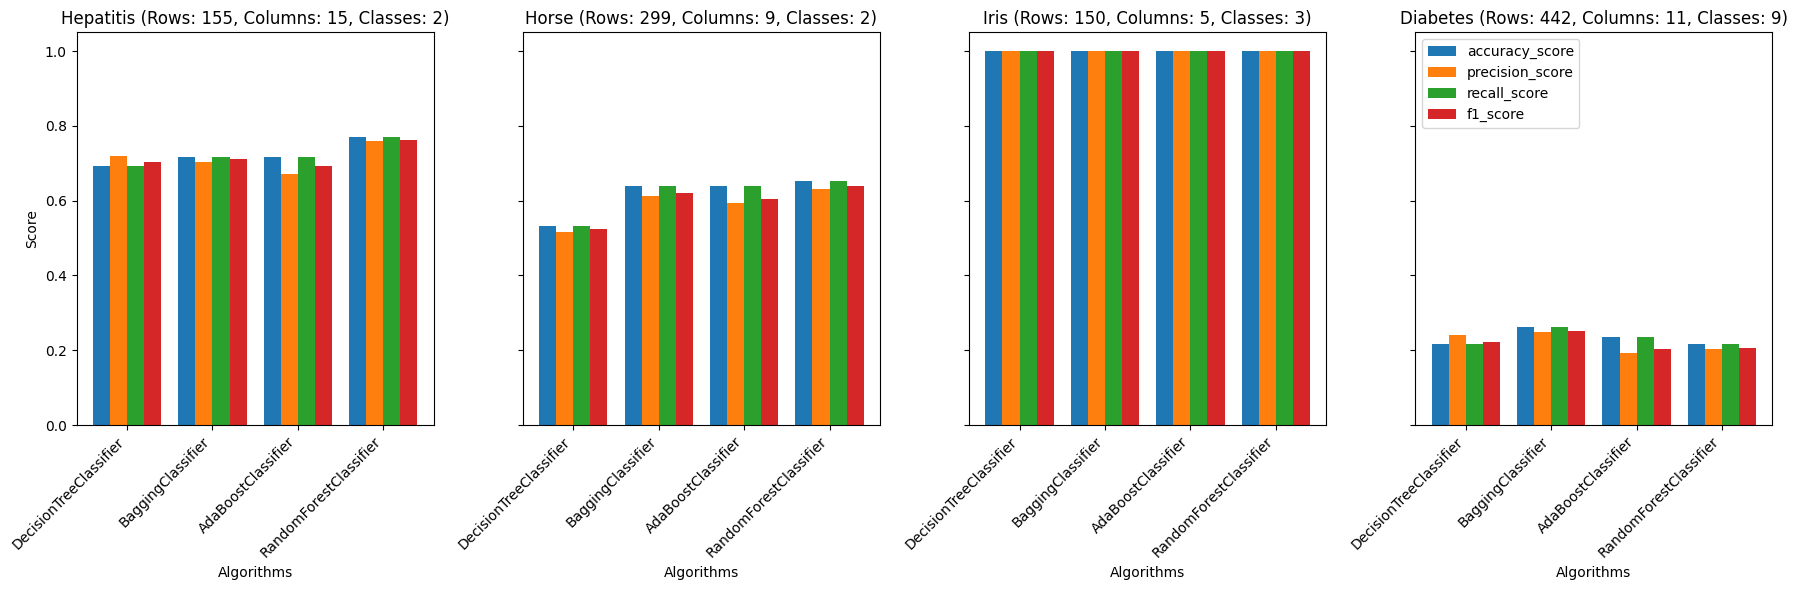

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming tableDF is already populated as in the previous steps

# Set up the data for plotting
metrics = ['accuracy_score', 'precision_score', 'recall_score', 'f1_score']
algorithms = tableDF['Algorithm'].unique()
dataset_names = tableDF['Dataset'].unique()

# Set up subplots
fig, axes = plt.subplots(1, len(dataset_names), figsize=(18, 6), sharey=True)

# Ensure axes is iterable even if there's only one dataset
if len(dataset_names) == 1:
    axes = [axes]

# Plot each dataset in a separate subplot
for idx, dataset in enumerate(dataset_names):
    ax = axes[idx]
    
    # Extract data for the current dataset
    dataset_data = tableDF[tableDF['Dataset'] == dataset]
    
    # Define the position of bars for each algorithm
    positions = np.arange(len(algorithms))
    width = 0.2  # Width of the bars
    
    # Plot bars for each metric
    for i, metric in enumerate(metrics):
        metric_values = dataset_data[metric].values
        ax.bar(positions + i * width, metric_values, width, label=metric)
    
    # Set title, labels, and ticks for each subplot
    ax.set_title(f"{dataset}")
    ax.set_xticks(positions + width * (len(metrics) - 1) / 2)
    ax.set_xticklabels(algorithms, rotation=45, ha='right')
    ax.set_xlabel('Algorithms')

# Add a shared y-label
axes[0].set_ylabel('Score')

# Add the legend to the last subplot
axes[-1].legend(loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
